<a href="https://colab.research.google.com/github/RDGopal/Prompt-Engineering-Guide/blob/main/Lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Language Modeling
Language modeling in natural language processing (NLP) plays a pivotal role in the development of intelligent systems that can understand and generate human language. Essentially, a language model aims to predict the likelihood of a sequence of words or the probability of the next word given a specific context. By capturing the underlying structure and patterns in textual data, language models facilitate various NLP tasks, such as machine translation, text summarization, sentiment analysis, and conversational AI.


#Probabilistic Language Modeling with n-grams
Probabilistic language modeling using n-grams is a fundamental approach in NLP that leverages the statistical properties of text to predict word sequences. An n-gram model represents text as contiguous sequences of n words, where the context for predicting the next word is limited to the previous n-1 words. For instance, a bigram (n=2) model restricts the context to a single preceding word, while a trigram (n=3) model considers the two preceding words.
N-gram models estimate the probabilities of word sequences by calculating their frequency in a given corpus. They utilize the Markov assumption, which states that the probability of the next word depends only on the preceding n-1 words, thus simplifying computation.

Despite their simplicity, n-gram models have been widely used in various NLP tasks, such as speech recognition, machine translation, and text generation. However, they have limitations, including data sparsity and the inability to capture long-range dependencies in text. The emergence of more sophisticated techniques like deep learning-based language models has shifted the focus, but n-gram models still hold relevance as a foundation for understanding language modeling and its development.

In this session, we will explore n-grams-based language modeling. We will also explore language modeling using word embeddings.


#Example: A Jane Austin Novel
We will explore ‘next word prediction’ and ‘text generation’ based on the Jane Austin novel ‘Sense and Sensibility’. Let’s look first at all the books that are available.


## View books and download

In [ ]:
# List available texts in the Gutenberg corpus
print(gutenberg.fileids())

In [ ]:
import nltk
nltk.download('gutenberg')  # Make sure the Gutenberg corpus is downloaded
from nltk.corpus import gutenberg

# Load "Sense and Sensibility" text
sas = gutenberg.raw('austen-sense.txt')

# Print the first 500 characters of "Sense and Sensibility"
print(sas[:500])


##n-gram model for next word prediction and text generation.

Following are the key steps.

Step 1: Preprocess the Text
Start by tokenizing the text, which is necessary for creating n-grams.

Step 2: Build the N-gram Model
Create a trigram model, which will be used for predicting the next word based on the previous two words.

Step 3: Next Word Prediction
Write a function that takes two words as input and predicts the most probable next word.

Step 4: Text Generation
Using the trigram model, generate text by iteratively predicting the next word.

In [7]:
import nltk
from nltk import word_tokenize, ngrams
from collections import defaultdict, Counter
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(sas.lower())  # Convert to lower case

# Generate trigrams from the tokens
trigrams = list(ngrams(tokens, 3))
trigram_freq = defaultdict(Counter)

# Populate the frequencies of trigrams
for w1, w2, w3 in trigrams:
    trigram_freq[(w1, w2)][w3] += 1

# Function to predict the next word
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        # Get the most common next word for the given bigram (w1, w2)
        return trigram_freq[(w1, w2)].most_common(1)[0][0]
    else:
        return None

# Function to generate text
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Next word after 'she was': not
Generated text: she was not in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles , as


### Test the results

In [12]:
# Example usage of the prediction function
print("Next word:", predict_next_word('was', 'not'))

Next word: in


In [15]:
# Example usage of the text generation function
start_words = ("was", "not")
print(generate_text(start_words, 100))

was not in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles , as she had been in the world . '' `` i am sure i would not be in town , and the two miss steeles ,


### Improving text generation
The approach of  picking the most frequent next word in text generation results in text repetition and uninteresting text.

We will modify the `predict_next_word` function to choose the next word based on a probability distribution rather than just picking the most frequent next word. This way, the selection will still favor more likely words but won't always select the same word every time.


In [ ]:
import random

# Function to predict the next word with randomness
def predict_next_word(w1, w2):
    if (w1, w2) in trigram_freq:
        next_words = list(trigram_freq[(w1, w2)].elements())
        return random.choice(next_words) if next_words else None
    else:
        return None

# Function to generate text with randomness
def generate_text(start_words, num_words):
    if len(start_words) < 2:
        return "Please provide at least two starting words."

    generated_words = list(start_words)
    for _ in range(num_words):
        next_word = predict_next_word(generated_words[-2], generated_words[-1])
        if next_word is None:
            break  # Break if no next word is found
        generated_words.append(next_word)

    return ' '.join(generated_words)



In [18]:
# Example usage of the text generation function
start_words = ("it", "was")
print(generate_text(start_words, 500))

it was screened from their hills ; and i thought i would not be defended ; but you would not oppose the parties arranged by her imagination placed before her mother was her own gratitude prompted ; and promised to be most wounding to her it was at least five or six weeks . the night . mrs. palmer soon after his arrival , and treat her with lavender water . it is ! i was exceedingly pleased to be the case , where elinor wrote , nor too speedily made use of sir john , who were attracted by resemblance of disposition ; and before she could distinguish a large one . she will soon have learned to rank the innumerable comforts of life rendered many additions to the housekeeper , mr. palmer , esq . was she , `` nothing at all , and never looked happier than when i had felt no real alarm . a few minutes before she ought to feel a little return of anxiety ) `` it would seem strong , natural , sterling insignificance , though still unable to say -- fourteen hundred pounds a-piece . mr. palmer wo

# Embeddings
We will use the `gensim` library, which provides straightforward implementations of word2vec, to create word embeddings using the CBOW model. After training the model on the novel's text, we'll create a function to predict the next word based on the similarity of word embeddings and another function for generating text.

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Assuming `sas` contains the raw text of "Sense and Sensibility"
tokens = word_tokenize(sas.lower())  # Tokenize and convert to lower case

# Organize the tokens into sentences, Word2Vec needs data in format of list of lists of tokens
sentences = [tokens[i:i+100] for i in range(0, len(tokens), 100)]


In [20]:
# Train the CBOW model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # sg=0 specifies CBOW


###Next word prediction

In [21]:
def predict_next_word_cbow(current_words):
    # Ensure the model is trained with all the words in current_words
    current_words = [word for word in current_words if word in model.wv.key_to_index]
    if not current_words:
        return "Unknown words"

    # Use the model to predict the most similar word
    similar_words = model.wv.most_similar(positive=current_words, topn=1)
    return similar_words[0][0]


till


In [ ]:
print(predict_next_word_cbow(["sense", "and"]))

### Text Generation (deterministic)

In [22]:
def generate_text_cbow(start_words, num_words):
    generated_words = start_words.split()
    for _ in range(num_words):
        next_word = predict_next_word_cbow(generated_words[-2:])
        generated_words.append(next_word)
    return ' '.join(generated_words)

sense and till without its within without over within without over within


In [ ]:
print(generate_text_cbow("sense and", 10))

Text Generation (stochastic)

In [23]:
import random

def predict_next_word_cbow(current_words, topn=5):
    # Ensure the model is trained with all the words in current_words
    current_words = [word for word in current_words if word in model.wv.key_to_index]
    if not current_words:
        return "Unknown words"

    # Fetch top 'n' similar words based on the positive example of the current words
    similar_words = model.wv.most_similar(positive=current_words, topn=topn)

    # Extract words and their similarity scores
    words, scores = zip(*similar_words)

    # Normalize scores to form a probability distribution
    total_score = sum(scores)
    probabilities = [score / total_score for score in scores]

    # Randomly choose one word based on their similarity scores as probabilities
    next_word = random.choices(words, weights=probabilities, k=1)[0]
    return next_word

print(predict_next_word_cbow(["sense", "and"]))


most


In [37]:
def generate_text_cbow(start_words, num_words):
    generated_words = start_words.split()
    for _ in range(num_words):
        next_word = predict_next_word_cbow(generated_words[-2:], topn=10)  # Use top 10 words for randomness
        generated_words.append(next_word)
    return ' '.join(generated_words)

print(generate_text_cbow("sense and", 50))


sense and against eyes most manner left spirits three its till under most family country friends having family till seemed family against under three near spirits against seemed determined towards nor down instantly old up nor present up instantly down old place passed up still through instantly passed towards place seemed against


It’s important to note that the quality of the generated text depends on the quality of the word embeddings used. The word embeddings in this example were trained on a small dataset using the CBOW word2vec model with a low-dimensional embedding space. As a result, the generated text may not be as coherent as expected.

As the code above illustrates, both next word prediction and text generation tasks are complicated and these algorithms perform rather poorly. This is due to their inability to capture long-range dependencies in text. Large language models (LLMs) can address these limitations, but come at a huge cost in terms of training and computation.


### Find 'semantically close' words

The most_similar method is a feature of Gensim's Word2Vec implementation and is commonly used in natural language processing to find words that are most similar to a given word or set of words based on word embeddings. The method essentially calculates the cosine similarity between the specified word(s) and all other words in the model's vocabulary.

Understanding Cosine Similarity
Cosine similarity measures the cosine of the angle between two vectors. In the context of word embeddings, it is a measure of the similarity between two words. The cosine similarity between two vectors
$u$ and $v$ is defined as:

\
$$
similarity = \cos(\theta) = \frac{u \cdot v}{\|u\| \|v\|}
$$


where $u \cdot v$  is the dot product of the vectors and $\|u\|$  and $\|v\|$ are the norms (or magnitudes) of the vectors.


Steps Performed by `most_similar`

* Vector Retrieval: First, the method retrieves the vector(s) for the input word(s). If multiple words are provided, it typically averages their vectors to create a single query vector.

* Similarity Calculation: The method then calculates the cosine similarity between this query vector and all other vectors in the trained model (i.e., the embeddings of all words in the vocabulary).

* Sorting: The cosine similarities are sorted in descending order.

* Top N Results: Finally, the method returns the top N words with the highest cosine similarities.

Optional Parameters

* Positive and Negative Words: The method allows for both positive and negative words. Positive words contribute positively towards the similarity, while negative words contribute negatively. This is useful for analogy tasks (e.g., "king" - "man" + "woman" = "queen").

* Top N: You can specify how many of the most similar words to retrieve.

In [ ]:
def find_closest_words(input_word, topn=10):
    if input_word in model.wv.key_to_index:
        # Find the topn most similar words
        similar_words = model.wv.most_similar(positive=[input_word], topn=topn)
        return similar_words  # This returns a list of tuples (word, similarity)
    else:
        return f"The word '{input_word}' is not in the vocabulary."

In [38]:
# Example usage of the function
print(find_closest_words("sense", 10))

[('look', 0.9989306926727295), ('once', 0.9988526105880737), ('made', 0.9988155364990234), ('even', 0.9987602829933167), ('settled', 0.9986779093742371), ('since', 0.9986322522163391), ('young', 0.9986109733581543), ('comfort', 0.9985936880111694), ('kind', 0.9985772371292114), ('people', 0.9985572695732117)]


### 2-D Plot

Steps:
* Retrieve Closest Words: Get the 100 closest words to the input word using the most_similar method.

* Extract Embeddings: Extract the embedding vectors for these words.

* Apply t-SNE: Use t-SNE to reduce the dimensionality of these vectors to two dimensions. Dimensionality reduction techniques such as t-SNE (t-Distributed Stochastic Neighbor Embedding) or PCA (Principal Component Analysis) can be used. We will use t-SNE here because it is particularly well-suited for visualizing high-dimensional data in two or three dimensions.

* Plotting: Plot the resulting two-dimensional points using matplotlib.

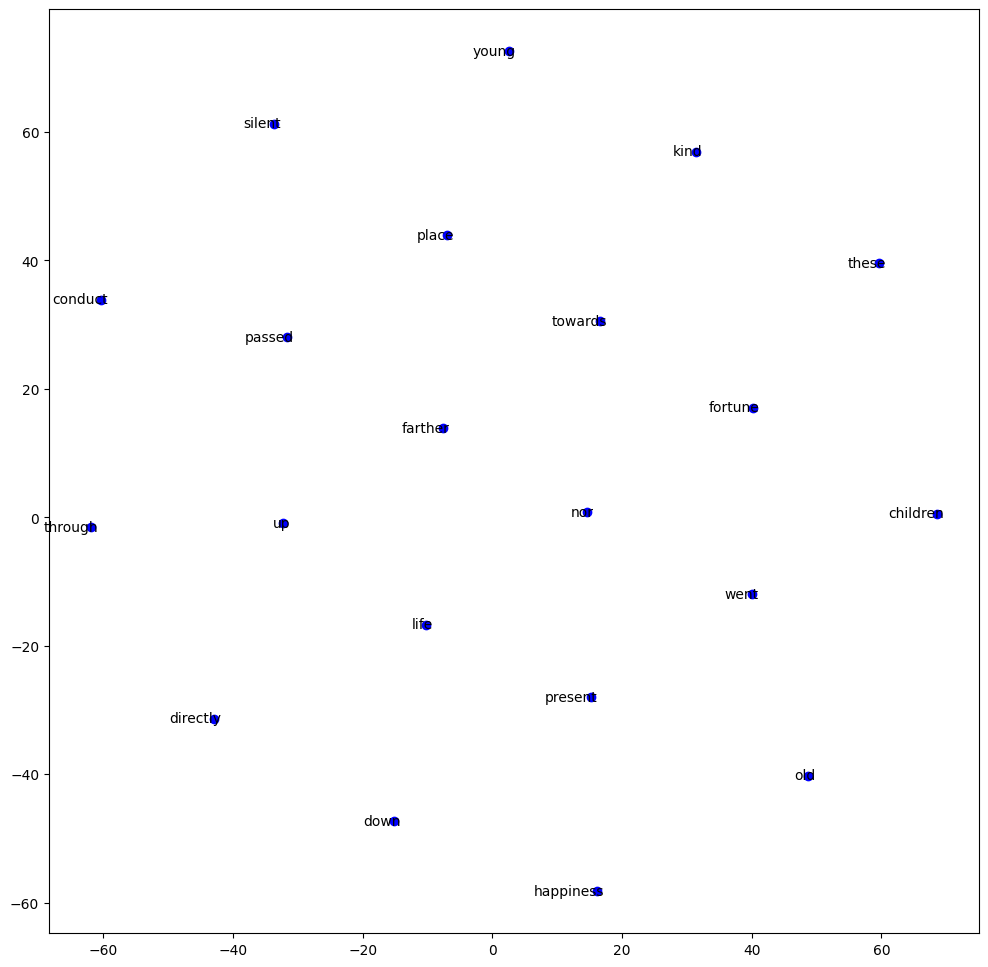

In [33]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_closest_words(model, input_word, topn=20):
    if input_word not in model.wv.key_to_index:
        print(f"The word '{input_word}' is not in the vocabulary.")
        return

    # Get the closest words specified by 'topn'
    closest_words = model.wv.most_similar(positive=[input_word], topn=topn)
    words = [word for word, _ in closest_words]
    words.append(input_word)  # Also include the input word

    # Extract the corresponding vectors
    word_vectors = np.array([model.wv[word] for word in words])

    # Use t-SNE to reduce dimensionality
    perplexity_value = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    Y = tsne.fit_transform(word_vectors)

    # Plotting
    plt.figure(figsize=(12, 12))
    plt.scatter(Y[:, 0], Y[:, 1], color='blue')

    for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, -5),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.show()

# Example usage of the function
plot_closest_words(model, "happiness", topn=20)  # Now handles small numbers of words gracefully


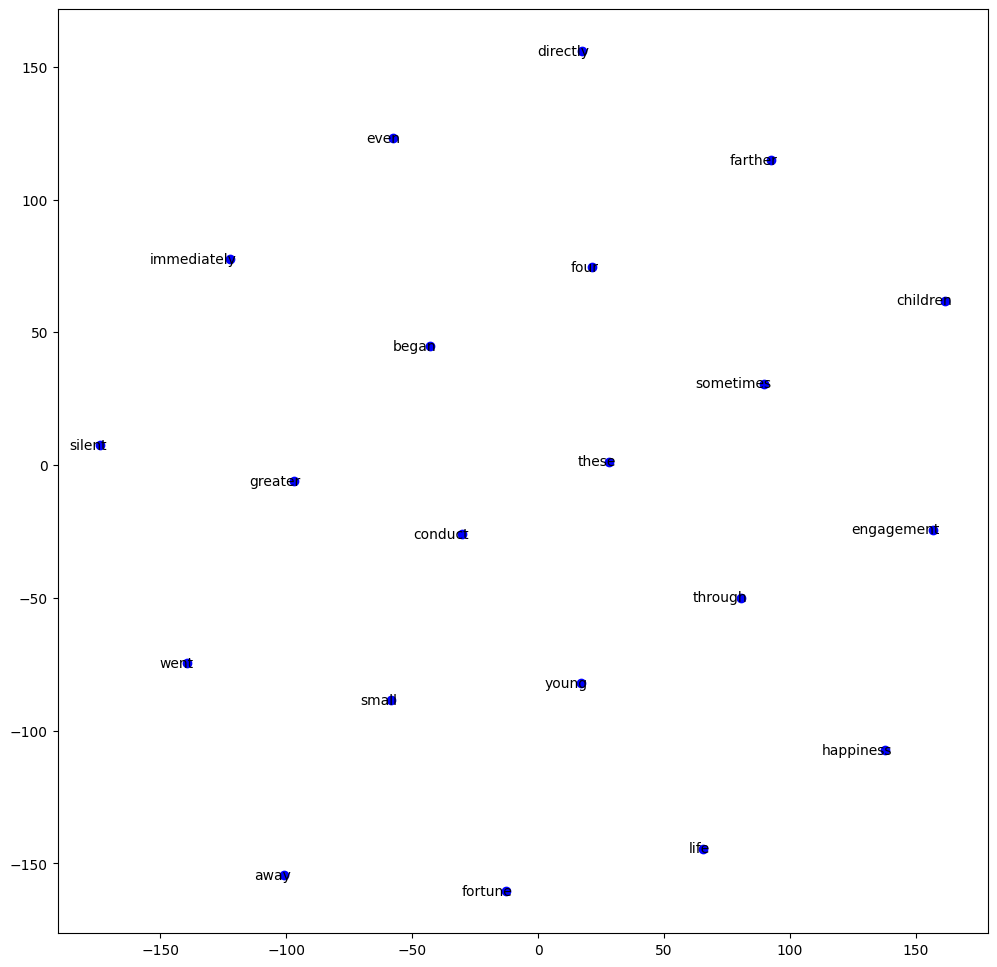

In [34]:
# Example usage of the function
plot_closest_words(model, "life", topn=20)  # Now handles small numbers of words gracefully

###3-D Plot

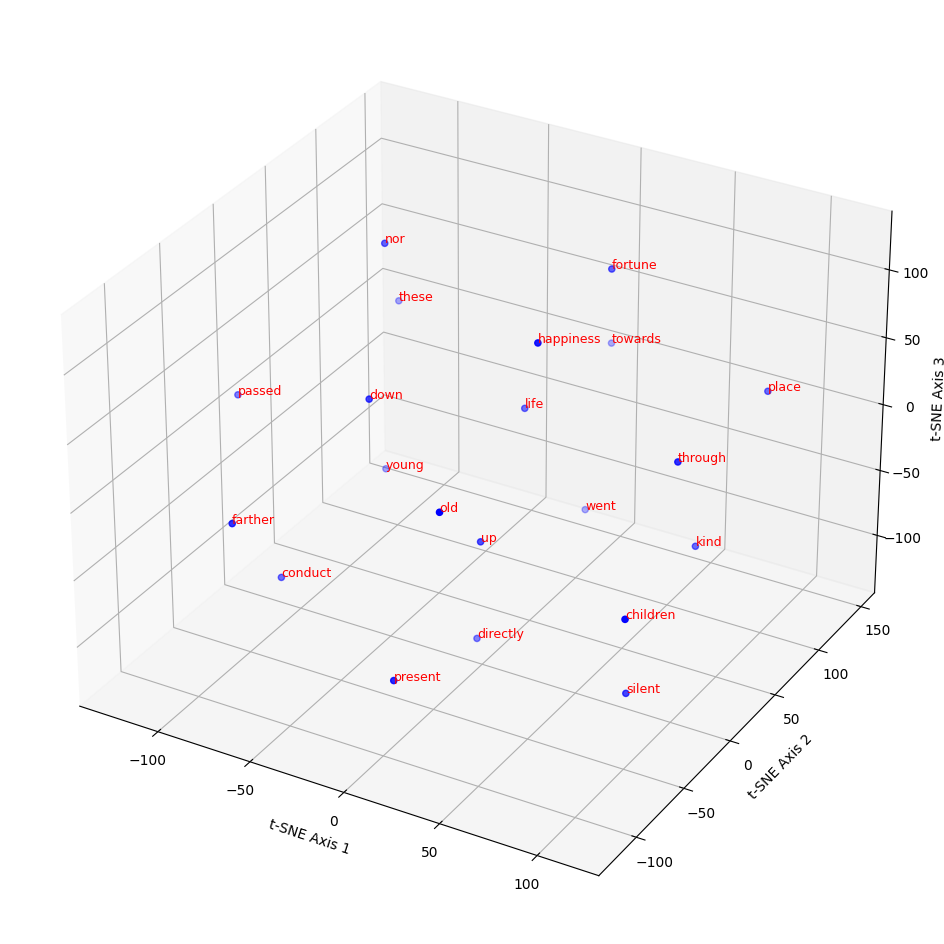

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This is needed for 3D plotting
from sklearn.manifold import TSNE
import numpy as np

def plot_closest_words_3d(model, input_word, topn=100):
    if input_word not in model.wv.key_to_index:
        print(f"The word '{input_word}' is not in the vocabulary.")
        return

    # Get the closest words specified by 'topn'
    closest_words = model.wv.most_similar(positive=[input_word], topn=topn)
    words = [word for word, _ in closest_words]
    words.append(input_word)  # Also include the input word

    # Extract the corresponding vectors
    word_vectors = np.array([model.wv[word] for word in words])

    # Use t-SNE to reduce dimensionality to 3D
    perplexity_value = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
    tsne = TSNE(n_components=3, random_state=42, perplexity=perplexity_value)
    Y = tsne.fit_transform(word_vectors)

    # Plotting in 3D
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], color='blue')

    for label, x, y, z in zip(words, Y[:, 0], Y[:, 1], Y[:, 2]):
        ax.text(x, y, z, label, color='red', fontsize=9)

    ax.set_xlabel('t-SNE Axis 1')
    ax.set_ylabel('t-SNE Axis 2')
    ax.set_zlabel('t-SNE Axis 3')
    plt.show()

# Example usage of the function
plot_closest_words_3d(model, "happiness", topn=20)


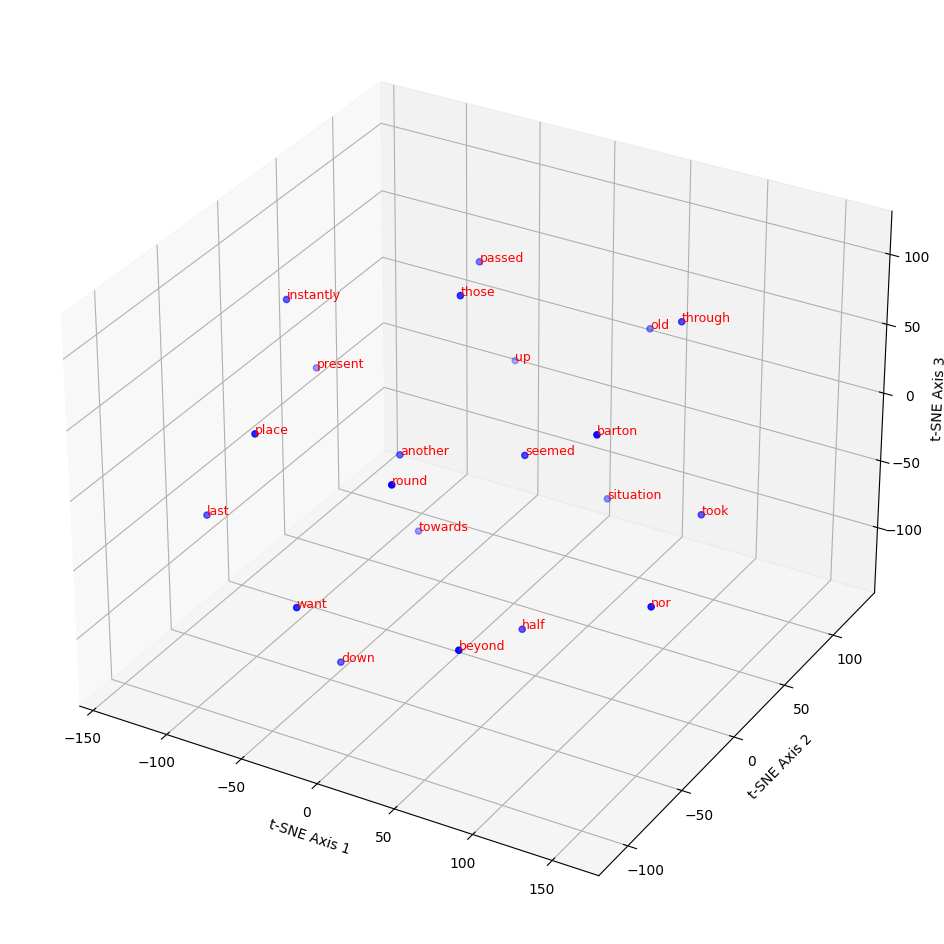

In [36]:
# Example usage of the function
plot_closest_words_3d(model, "present", topn=20)

# Your turn

1. Create next word prediction and text generation based on the novel Moby Dick, by Herman Melville. You can access it with 'melville-moby_dick.txt'.
1. Create text generation based on the file `tinyshakespeare.txt` using n-grams.
2. Repeat with embeddings.
3. Find the closest words to 'king' and plot the results.